Używane biblioteki

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Hermite'a

Zakladam, ze input jest postaci

xs = [x1, x2, x3, x4, ...]
ys = [ [y1, y1', y1'', ...], ... ], czyli do kazdego x-a przypisana jest lista y-ów, z której każdy kolejny oznacza wartość w kolejnej pochodnej

In [10]:
#Funkcja pomocnicza do wypisywania macierzy z wartościami
def pretty_print(array):
    
    for row in array:
        for el in row:
            print(el, end = ' ')
        print("")

In [11]:
def hermite_interpolation(xs, ys, x):

    #Tworzy wektor z wartośami [x1, x1, x1, x2, x2, ...], gdzie ilośc xi to ilość wartości funkcji i pochodnych dla danego x-a
    x_map = []
    for i, mi in enumerate(ys):
        for _ in range(len(mi)):
            x_map.append(xs[i])

    #Wyznaczam sumę krotności
    m = sum([len(mi) for mi in ys])
    
    #Tworzę początkową macierz
    A = [[ None for j in range(m)] for i in range(m)]
    
    #Wypełniam macierz znanym wartościami f(x)
    current_row = 0
    for mi in ys:
        for j in range(len(mi)):
            A[current_row][0] = mi[0]
            current_row += 1
            
    #Wypełniam macierz znanymi wartościami pochodnych
    row = 0
    for mi in ys:
        for i in range(len(mi)):
            for j in range(1, i + 1):
                A[row][j] = mi[j] / math.factorial(j)
            row += 1
            
    #Wypełniam macierz wylioczonymi różnicami i wyliczam wspolczynniki
    coefficients = [A[0][0]]
    for i in range(1, m): #Aktualna pozycja do ktorej zmierzamy
        for j in range(1, i + 1):
            if A[i][j] == None:
                A[i][j] = (A[i][j - 1] - A[i - 1][j - 1]) / (x_map[i] - x_map[i - j])
        coefficients.append(A[i][i])
        
    #pretty_print(A)
    
    diffs = [x - xi for xi in x_map]
    
    w = coefficients[0]
    
    for i in range(1, m):
        
        temp = coefficients[i]
        
        for j in range(0, i):
            temp *= diffs[j]
            
        w += temp
        
    return w  

Równomiernie rozprowadzone punkty

In [12]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n - 1)] + [b]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [13]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji zadanej wzorem

In [45]:
def plot_function(func, range_a, range_b, func_x = None):
    
    if func_x == None:
        func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = "Zadana funkcja", color = 'blue')

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

Zadana funkcja

f(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [15]:
f_range_a = -4 * math.pi
f_range_b = 4 * math.pi

In [16]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * math.cos(1.5 * x)

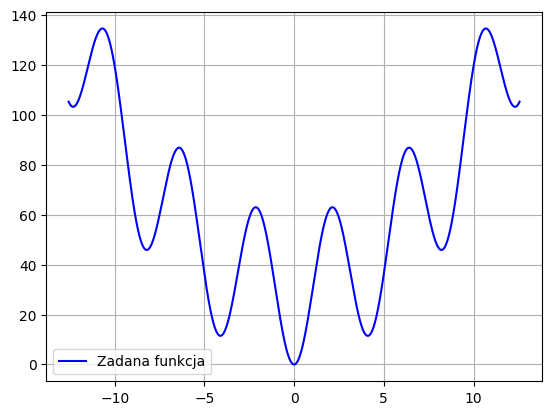

In [17]:
plot_function(f, f_range_a, f_range_b)
plt.show()

Pierwsza pochodna funkcji f(x)

g(x) = f'(x) = 45 * sin(1.5 * x) + 4x / 3

In [18]:
def g(x):
    return 45 * math.sin(1.5 * x) + ( (4 * x) / 3)

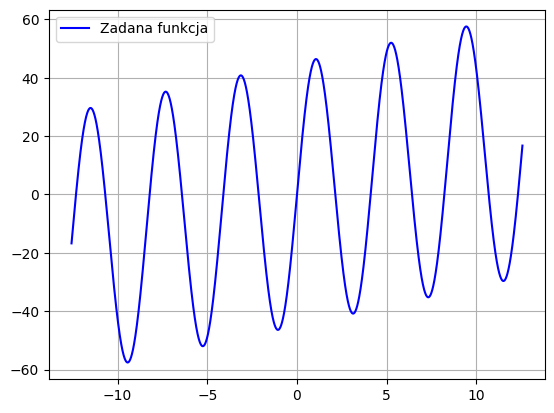

In [46]:
plot_function(g, f_range_a, f_range_b)
plt.show()

Interpolacja

In [23]:
def interpolate(point_generation_function, n, test_points_count, nodes_plot_label = 'Węzły'):
    
    xs = point_generation_function(f_range_a, f_range_b, n)
    
    ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

    check_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(hermite_interpolation(xs, ys, check_x[i]))

    plot_function(f, f_range_a, f_range_b)
    plt.plot(check_x, check_y, color = 'red', label = "Funkcja interpolująca")
    #plt.scatter(xs, ys, color = 'black', label=nodes_plot_label)
    
    plt.legend()
    plt.grid(True)
    #plt.savefig("interpolacja.png")
    plt.show()


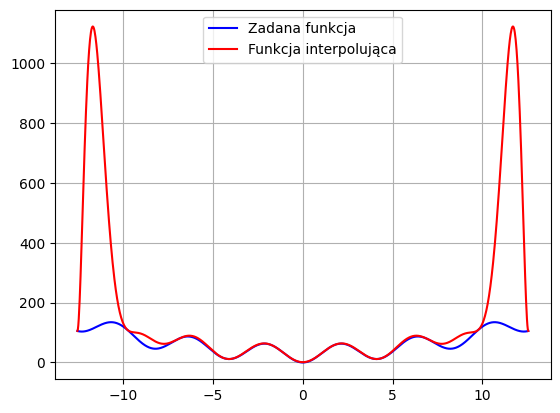

In [24]:
interpolate(get_evenly_distributed, 10, 1000)

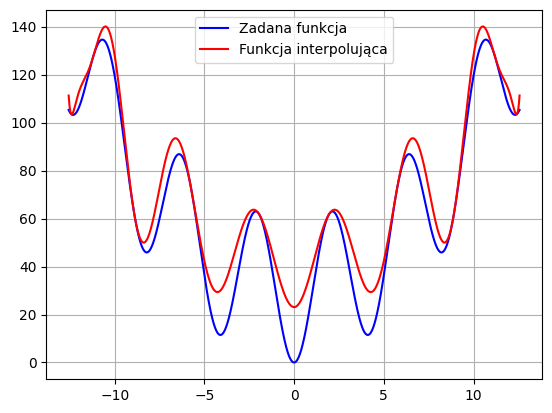

In [30]:
interpolate(get_chebyshev_nodes, 10, 1000)

Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Maksumum

1.1 Różnica maksimum dla interpolacji Hermite'a z równomiernie wygenerowanymi węzłami

In [33]:
def interpolation_maximum_difference(point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        xs = point_generation_function(f_range_a, f_range_b, N[i])
        ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f(test_x[j]) - hermite_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"{maksimum}")

In [34]:
interpolation_maximum_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30 + 1)

59.998664944512306
59.9986649445126
49.7956123162688
225.22503911334
59.99866494451386
784.6180626866017
1189.120325710208
1009.2933583229004
593.1590567656885
263.88757570500786
93.37748721451985
27.163128899892797
6.647148448161644
1.3915894241701494
0.25336123446678016
0.040475075437555574
0.0057288042423664365
0.0010326456576876808
0.0004611592085694838
0.0010637449786514708
0.001635977529616639
0.0014555131479738748
0.0035517809408389667
0.0014553071712981591
0.003298483327256463
0.005008504391923907
0.007506891229468238
0.03331847026454682
0.10457966472685598


In [35]:
interpolation_maximum_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30 + 1)

79.64971054530126
139.1125369639632
94.1425256895707
119.68872311513877
96.9158105247455
116.67587958925225
56.92762792276713
23.08718239940716
6.339504707239485
1.4342024554823203
0.2526956781405616
0.03763824942302561
0.004647111764782608
0.0004963667966858473
0.0002819789098680303
0.0005853736193870418
0.0007916919474979522
0.001561307460733019
0.001964012261552739
0.002942638073506032
0.007316377437447841
0.011653203015072222
0.010951117915212194
0.021355593437291986
0.021978681864752048
0.045639334280721755
0.02681266281295791
0.045996451189154186
0.11401901067200981


In [37]:
interpolation_maximum_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50 + 1)

0.10457966472685598
0.053398131049405606
0.6741767986063394
3.092821251700485
34.44718853051022
69.42667348953609
1550.3562191442984
39119.97142326401
128611.25667149702
662472.6295959348
6881676.5565476455
23994937.12071554
327827719.6135713
3675617932.2641826
45649930264.03531
1106600236468.6416
1749805447100.6284
41056817088311.28
323163380622031.94
1787317770553203.2
2.741030499137222e+16


In [38]:
interpolation_maximum_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50 + 1)

0.11401901067200981
2.279176187721376
18.97147509075502
139.4509955465804
1050.073322771784
18780.949136018455
55098.39674679536
195829.65297325316
2562438.05167586
46701176.221041255
273142725.97437775
5268859221.310878
26005278648.21523
351491699541.9313
11728769764299.586
24116339368104.65
609050659154549.4
1.4679569218897978e+16
9.235631650730763e+16
2.476224750619683e+18
1.0549579862727117e+19


2. Błąd średniokwadratowy

In [41]:
def interpolation_mean_difference(point_generation_function, test_points_count, interpolation_range_a, intepolation_range_b):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(interpolation_range_a, intepolation_range_b + 1)]

    for i in range(len(N)):

        suma = 0

        #Evenly distributed xs
        xs = point_generation_function(f_range_a, f_range_b, N[i])
        ys = [ (f(xs[i]), g(xs[i])) for i in range(len(xs))]

        test_x = get_evenly_distributed(f_range_a, f_range_b, test_points_count)
        
        for j in range(test_points_count):

            suma += (f(test_x[j]) - hermite_interpolation(xs, ys, test_x[j])) ** 2
    
        print(f"{suma / test_points_count}")

In [42]:
interpolation_mean_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30 + 1)

1348.6499999999962
1348.6499999999974
923.2303338452006
8382.722496071776
1348.6500000000042
62629.17050438974
119582.38037314294
74267.20112630526
22553.238293971674
3977.6023733520087
448.8926430581497
34.53311683441119
1.8943800084766198
0.07666988367939497
0.0023514895034487345
5.5868993648296904e-05
1.0405515706473779e-06
1.7468453792713638e-08
2.373027876918447e-09
4.624223160578643e-09
8.540746813594548e-09
1.443656231143529e-08
4.956630198458667e-08
2.5628125965286906e-08
8.408073800100425e-08
1.4287253429891085e-07
2.8961945876319777e-07
1.869150608896407e-05
0.00015770180392866946


In [43]:
interpolation_mean_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=3, intepolation_range_b=30 + 1)

1281.3973484510398
5158.79597149693
2170.2521866004095
3131.775325382166
1642.593617589515
1459.2093427534069
556.6157972922463
97.51730465865066
8.991518690440431
0.48652693486004905
0.016694449318604376
0.00038450002903688647
6.2088116682373845e-06
7.279515871818549e-08
1.1739996410646244e-09
1.3984461179044264e-09
4.464796470650638e-09
1.2927772066434071e-08
2.732523689555011e-08
8.456280189681323e-08
1.7822692696012584e-07
6.211451275522954e-07
1.0462219172850645e-06
2.458729016726047e-06
3.6968615380674447e-06
8.459483720723143e-06
8.455639620897886e-06
1.556219948872853e-05
4.998954349763812e-05


In [44]:
interpolation_mean_difference(point_generation_function=get_evenly_distributed, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50 + 1)

0.00015770180392866946
3.364566403443269e-05
0.0010303476656194949
0.09266210239708567
3.175715891992273
15.527326699191853
8344.61981394564
5920380.250356008
39989069.3923659
952941840.3352141
166404050576.22397
1412377657364.7605
439626778775650.2
4.561022232530738e+16
9.205598852591044e+18
2.81478899229673e+21


KeyboardInterrupt: 

In [ ]:
interpolation_mean_difference(point_generation_function=get_chebyshev_nodes, test_points_count=1000, interpolation_range_a=31, intepolation_range_b=50 + 1)